In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [3]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [8]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## Neural Network without Regularization

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [12]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 9s - loss: 1.0290 - accuracy: 0.6778 - val_loss: 0.9777 - val_accuracy: 0.7000
Epoch 2/200
3/3 - 0s - loss: 0.8979 - accuracy: 0.6778 - val_loss: 0.8509 - val_accuracy: 0.7000
Epoch 3/200
3/3 - 0s - loss: 0.7960 - accuracy: 0.6778 - val_loss: 0.7103 - val_accuracy: 0.7000
Epoch 4/200
3/3 - 0s - loss: 0.6695 - accuracy: 0.6778 - val_loss: 0.5536 - val_accuracy: 0.7000
Epoch 5/200
3/3 - 0s - loss: 0.5520 - accuracy: 0.7333 - val_loss: 0.5031 - val_accuracy: 0.7000
Epoch 6/200
3/3 - 0s - loss: 0.4661 - accuracy: 0.7222 - val_loss: 0.3305 - val_accuracy: 0.9000
Epoch 7/200
3/3 - 0s - loss: 0.3525 - accuracy: 0.9444 - val_loss: 0.3204 - val_accuracy: 0.8333
Epoch 8/200
3/3 - 0s - loss: 0.3059 - accuracy: 0.9000 - val_loss: 0.2202 - val_accuracy: 0.9333
Epoch 9/200
3/3 - 0s - loss: 0.2429 - accuracy: 0.9667 - val_loss: 0.3533 - val_accuracy: 0.8333
Epoch 10/200
3/3 - 0s - loss: 0.3556 - accuracy: 0.7889 - val_loss: 0.1741 - val_accuracy: 0.9667
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.1675 - val_accuracy: 0.9667
Epoch 86/200
3/3 - 0s - loss: 0.0544 - accuracy: 0.9889 - val_loss: 0.1702 - val_accuracy: 0.9667
Epoch 87/200
3/3 - 0s - loss: 0.0658 - accuracy: 0.9667 - val_loss: 0.1763 - val_accuracy: 0.9667
Epoch 88/200
3/3 - 0s - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.2318 - val_accuracy: 0.9667
Epoch 89/200
3/3 - 0s - loss: 0.0498 - accuracy: 0.9778 - val_loss: 0.2173 - val_accuracy: 0.9667
Epoch 90/200
3/3 - 0s - loss: 0.0419 - accuracy: 0.9778 - val_loss: 0.1868 - val_accuracy: 0.9667
Epoch 91/200
3/3 - 0s - loss: 0.0358 - accuracy: 1.0000 - val_loss: 0.1982 - val_accuracy: 0.9667
Epoch 92/200
3/3 - 0s - loss: 0.0325 - accuracy: 0.9889 - val_loss: 0.2182 - val_accuracy: 0.9667
Epoch 93/200
3/3 - 0s - loss: 0.0419 - accuracy: 0.9778 - val_loss: 0.2022 - val_accuracy: 0.9667
Epoch 94/200
3/3 - 0s - loss: 0.0448 - accuracy: 0.9889 - val_loss: 0.2073 - val_accuracy: 0.9667
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.0279 - accuracy: 0.9889 - val_loss: 0.2113 - val_accuracy: 0.9667
Epoch 169/200
3/3 - 0s - loss: 0.0394 - accuracy: 0.9778 - val_loss: 0.1893 - val_accuracy: 0.9667
Epoch 170/200
3/3 - 0s - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.1881 - val_accuracy: 0.9667
Epoch 171/200
3/3 - 0s - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.2028 - val_accuracy: 0.9667
Epoch 172/200
3/3 - 0s - loss: 0.0257 - accuracy: 0.9778 - val_loss: 0.1980 - val_accuracy: 0.9667
Epoch 173/200
3/3 - 0s - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.2053 - val_accuracy: 0.9667
Epoch 174/200
3/3 - 0s - loss: 0.0463 - accuracy: 0.9778 - val_loss: 0.2203 - val_accuracy: 0.9667
Epoch 175/200
3/3 - 0s - loss: 0.0380 - accuracy: 0.9778 - val_loss: 0.1932 - val_accuracy: 0.9667
Epoch 176/200
3/3 - 0s - loss: 0.0442 - accuracy: 0.9778 - val_loss: 0.2186 - val_accuracy: 0.9667
Epoch 177/200
3/3 - 0s - loss: 0.0689 - accuracy: 0.9778 - val_loss: 0.3910 - val_accuracy: 0.9000
Epoch 178/

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

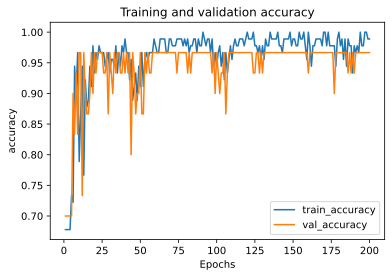

In [15]:
plot_metric(history, 'accuracy')

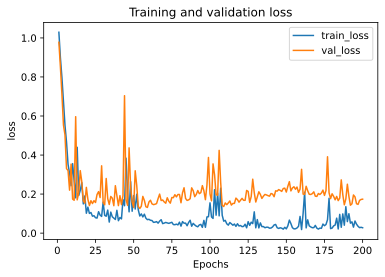

In [16]:
plot_metric(history, 'loss')

In [17]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0144 - accuracy: 1.0000


[0.014448912814259529, 1.0]

## Adding L2 regularization and Dropout

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [19]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [21]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.2990 - accuracy: 0.2889 - val_loss: 1.0982 - val_accuracy: 0.1667
Epoch 2/200
3/3 - 0s - loss: 1.1908 - accuracy: 0.2667 - val_loss: 1.1169 - val_accuracy: 0.2333
Epoch 3/200
3/3 - 0s - loss: 1.1583 - accuracy: 0.3333 - val_loss: 1.1136 - val_accuracy: 0.2333
Epoch 4/200
3/3 - 0s - loss: 1.1223 - accuracy: 0.3000 - val_loss: 1.1101 - val_accuracy: 0.2333
Epoch 5/200
3/3 - 0s - loss: 1.1111 - accuracy: 0.3667 - val_loss: 1.1128 - val_accuracy: 0.2333
Epoch 6/200
3/3 - 0s - loss: 1.0998 - accuracy: 0.3444 - val_loss: 1.1142 - val_accuracy: 0.2333
Epoch 7/200
3/3 - 0s - loss: 1.0840 - accuracy: 0.4000 - val_loss: 1.1105 - val_accuracy: 0.2333
Epoch 8/200
3/3 - 0s - loss: 1.0651 - accuracy: 0.4333 - val_loss: 1.1028 - val_accuracy: 0.2333
Epoch 9/200
3/3 - 0s - loss: 1.0452 - accuracy: 0.5000 - val_loss: 1.0965 - val_accuracy: 0.2333
Epoch 10/200
3/3 - 0s - loss: 1.1128 - accuracy: 0.3889 - val_loss: 1.0890 - val_accuracy: 0.2333
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.4774 - accuracy: 0.7333 - val_loss: 0.3436 - val_accuracy: 0.7333
Epoch 86/200
3/3 - 0s - loss: 0.4490 - accuracy: 0.7444 - val_loss: 0.3325 - val_accuracy: 0.7667
Epoch 87/200
3/3 - 0s - loss: 0.4562 - accuracy: 0.7444 - val_loss: 0.3223 - val_accuracy: 0.8000
Epoch 88/200
3/3 - 0s - loss: 0.4615 - accuracy: 0.8000 - val_loss: 0.3157 - val_accuracy: 0.8333
Epoch 89/200
3/3 - 0s - loss: 0.4380 - accuracy: 0.7667 - val_loss: 0.3110 - val_accuracy: 0.8333
Epoch 90/200
3/3 - 0s - loss: 0.4536 - accuracy: 0.7778 - val_loss: 0.3046 - val_accuracy: 0.8667
Epoch 91/200
3/3 - 0s - loss: 0.4342 - accuracy: 0.7667 - val_loss: 0.2978 - val_accuracy: 0.8667
Epoch 92/200
3/3 - 0s - loss: 0.4017 - accuracy: 0.7889 - val_loss: 0.2914 - val_accuracy: 0.8667
Epoch 93/200
3/3 - 0s - loss: 0.3782 - accuracy: 0.7889 - val_loss: 0.2831 - val_accuracy: 0.9333
Epoch 94/200
3/3 - 0s - loss: 0.4347 - accuracy: 0.7889 - val_loss: 0.2762 - val_accuracy: 0.9667
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.1255 - accuracy: 0.9667 - val_loss: 0.1302 - val_accuracy: 0.9667
Epoch 169/200
3/3 - 0s - loss: 0.0908 - accuracy: 0.9667 - val_loss: 0.1309 - val_accuracy: 0.9667
Epoch 170/200
3/3 - 0s - loss: 0.0732 - accuracy: 0.9889 - val_loss: 0.1262 - val_accuracy: 0.9667
Epoch 171/200
3/3 - 0s - loss: 0.0619 - accuracy: 0.9778 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 172/200
3/3 - 0s - loss: 0.1832 - accuracy: 0.9333 - val_loss: 0.1121 - val_accuracy: 0.9667
Epoch 173/200
3/3 - 0s - loss: 0.1430 - accuracy: 0.9556 - val_loss: 0.1227 - val_accuracy: 0.9667
Epoch 174/200
3/3 - 0s - loss: 0.2029 - accuracy: 0.9667 - val_loss: 0.1025 - val_accuracy: 0.9667
Epoch 175/200
3/3 - 0s - loss: 0.1517 - accuracy: 0.9667 - val_loss: 0.0982 - val_accuracy: 0.9667
Epoch 176/200
3/3 - 0s - loss: 0.1111 - accuracy: 0.9778 - val_loss: 0.0995 - val_accuracy: 0.9333
Epoch 177/200
3/3 - 0s - loss: 0.1201 - accuracy: 0.9667 - val_loss: 0.0977 - val_accuracy: 0.9667
Epoch 178/

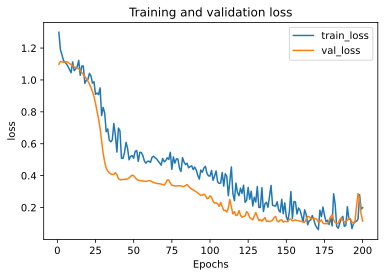

In [23]:
plot_metric(history, 'loss')

In [24]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0450 - accuracy: 1.0000


[0.045010607689619064, 1.0]